### Import Required Libraries

In [55]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

### function to create simple graph identifying commenter across multiple videos

In [56]:
def SimpleNxGraph(comments_df, channel, graph_title):

    #identify if commenter are identified as channel_id_text or Commenter 
    if "Commenter"  in comments_df.columns: 
        com_var = 'Commenter'
    else:
        com_var = 'channel_id_text'

    # Filter for the current channel
    channel_checker = comments_df['channel_id'] == channel
    current_channeldf = comments_df[channel_checker]
    current_channeldf.reset_index(inplace=True)
    videos = current_channeldf['video_id'].unique()

    #create a commenter dict for commenters to be stored in
    commenterdict = {}

    G = nx.DiGraph()

    # Iterate over videos to add video nodes
    for v in videos:
        video_checker = current_channeldf['video_id'] == v
        current_chan_vid_df = current_channeldf[video_checker]

        # Count commenters
        for commenter in current_chan_vid_df[com_var]:
            commenterdict[commenter] = commenterdict.get(commenter, 0) + 1

        # Add nodes for the videos, using the first date for the label
        video_date = current_chan_vid_df['date'].iloc[0]  # Get the first date for the video
        G.add_node(v, label=video_date[0:11])

    # Iterate over comments to create edges
    for row_index in range(len(current_channeldf)):
        channel_id = current_channeldf[com_var][row_index]
        weight = commenterdict[channel_id]

        # Add channel node if it doesn't exist
        if channel_id not in G:
            G.add_node(channel_id)

        # Create an edge from commenters to videos
        video_id = current_channeldf['video_id'][row_index]
        G.add_edge(channel_id, video_id, weight=weight)

    # Draw the graph
    pos = nx.spring_layout(G)  # positions for all nodes

    # Draw nodes and edges
    nx.draw_networkx_nodes(G, pos, nodelist=commenterdict.keys(), node_color="tab:blue")
    nx.draw_networkx_nodes(G, pos, nodelist=videos, node_color="tab:red")
    nx.draw_networkx_edges(G, pos)

    # Draw labels for video nodes
    labels = nx.get_node_attributes(G, 'label')
    nx.draw_networkx_labels(G, pos, labels, font_size=10)

    # Show plot
    plt.title(graph_title)
    plt.show()



### change the number in channel_list to change relevant youtuber

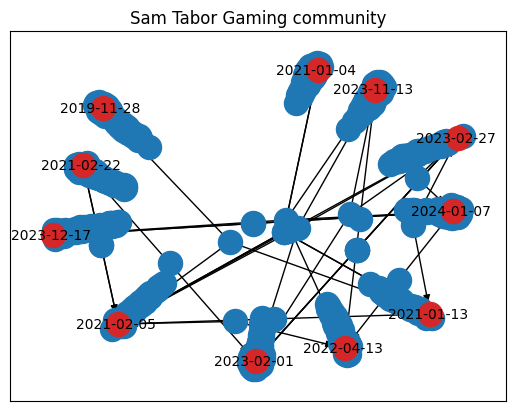

In [57]:
# Load data
comments = pd.read_csv("youtube_comments.csv")
channel_list = comments['channel_id'].unique()

#pick channel
channel = channel_list[4]
SimpleNxGraph(comments, channel, "Sam Tabor Gaming community")